# IBM HR ANALYTICS - EMPLOYEE ATTRITION & PERFORMANCE PREDICTION

### Part 3: Exploratory Data Analysis (EDA)

# SECTION 1: IMPORT LIBRARIES & LOAD DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Visualization settings
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Load the clean data
df = pd.read_csv('hr_analytics_for_powerbi.csv')
print(f"✅ Loaded data: {df.shape[0]} rows × {df.shape[1]} columns")


✅ Loaded data: 1470 rows × 32 columns


# SECTION 2: DEMOGRAPHIC ANALYSIS


DEMOGRAPHIC ANALYSIS


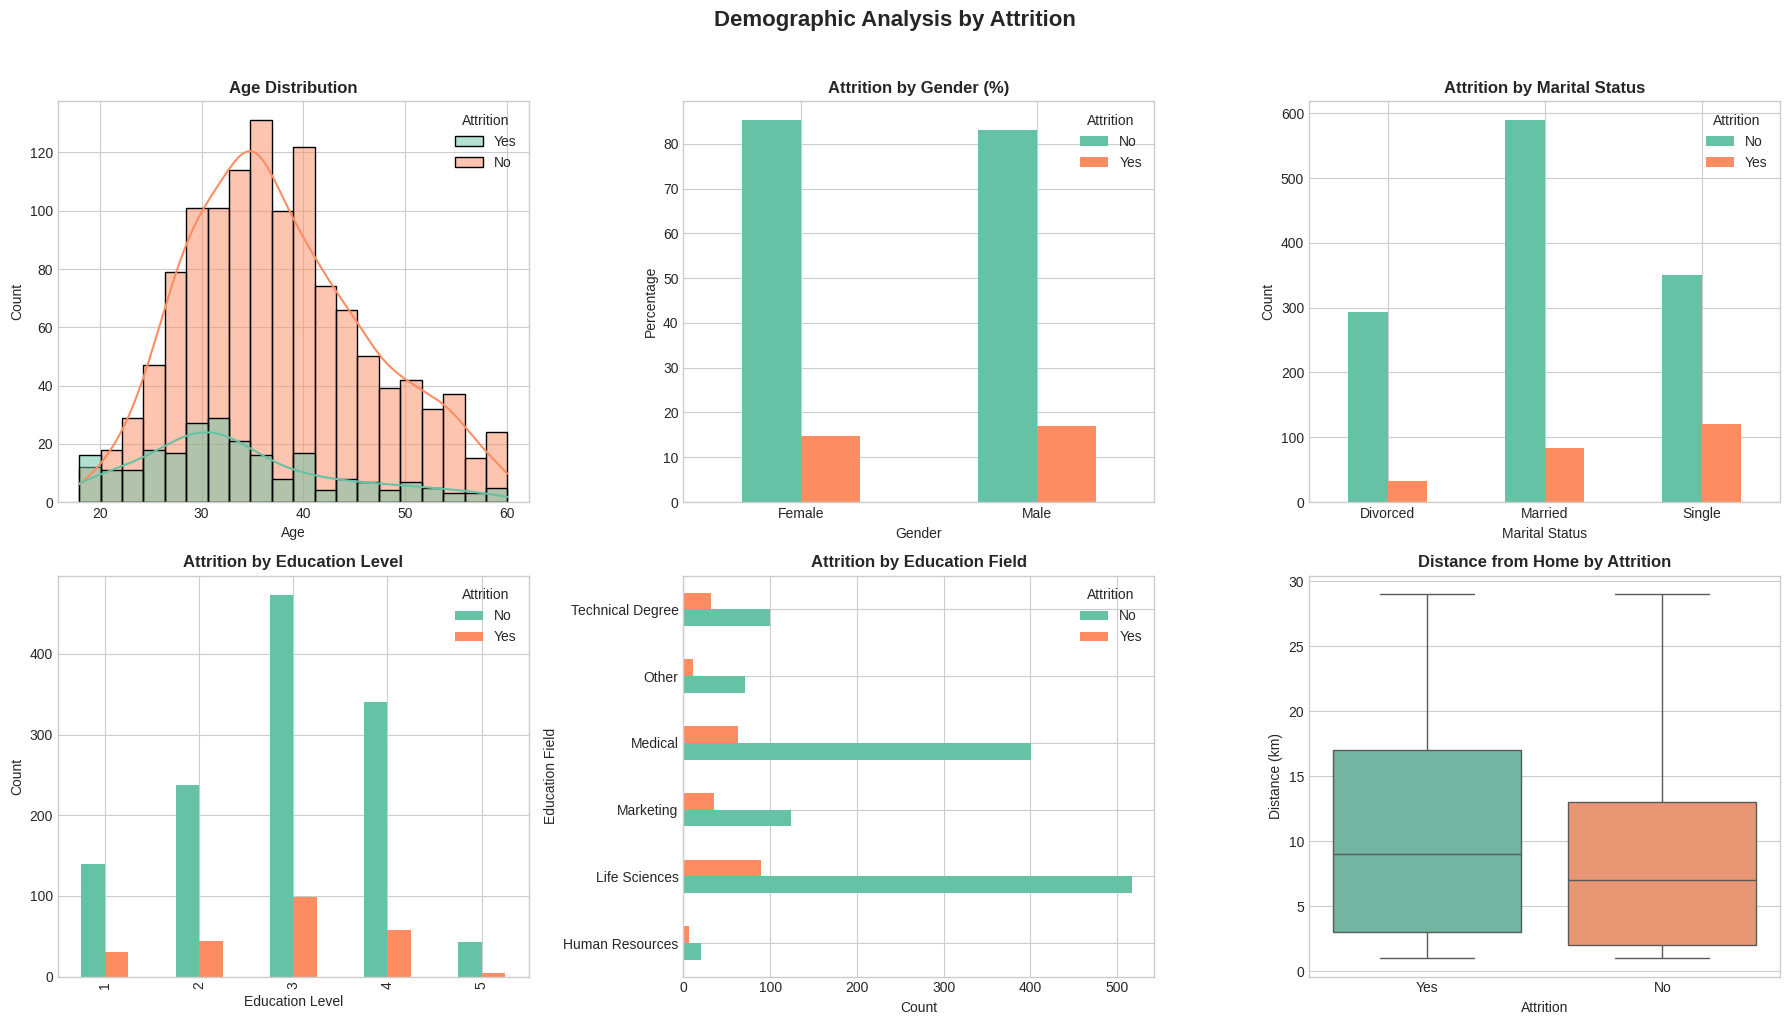

In [2]:
print("\n" + "="*80)
print("DEMOGRAPHIC ANALYSIS")
print("="*80)

# Create figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Demographic Analysis by Attrition', fontsize=16, fontweight='bold', y=1.02)

# 1. Age Distribution
sns.histplot(data=df, x='Age', hue='Attrition', bins=20, kde=True, ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Age Distribution', fontweight='bold')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Count')

# 2. Gender Distribution
gender_attrition = pd.crosstab(df['Gender'], df['Attrition'], normalize='index') * 100
gender_attrition.plot(kind='bar', ax=axes[0, 1], color=['#66c2a5', '#fc8d62'], rot=0)
axes[0, 1].set_title('Attrition by Gender (%)', fontweight='bold')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Percentage')
axes[0, 1].legend(title='Attrition', labels=['No', 'Yes'])

# 3. Marital Status
marital_data = df.groupby(['MaritalStatus', 'Attrition']).size().unstack()
marital_data.plot(kind='bar', ax=axes[0, 2], color=['#66c2a5', '#fc8d62'], rot=0)
axes[0, 2].set_title('Attrition by Marital Status', fontweight='bold')
axes[0, 2].set_xlabel('Marital Status')
axes[0, 2].set_ylabel('Count')
axes[0, 2].legend(title='Attrition')

# 4. Education Level
edu_data = df.groupby(['Education', 'Attrition']).size().unstack()
edu_data.plot(kind='bar', ax=axes[1, 0], color=['#66c2a5', '#fc8d62'])
axes[1, 0].set_title('Attrition by Education Level', fontweight='bold')
axes[1, 0].set_xlabel('Education Level')
axes[1, 0].set_ylabel('Count')
axes[1, 0].legend(title='Attrition')

# 5. Education Field
edu_field_attrition = pd.crosstab(df['EducationField'], df['Attrition'])
edu_field_attrition.plot(kind='barh', ax=axes[1, 1], color=['#66c2a5', '#fc8d62'])
axes[1, 1].set_title('Attrition by Education Field', fontweight='bold')
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_ylabel('Education Field')
axes[1, 1].legend(title='Attrition')

# 6. Distance from Home
sns.boxplot(data=df, x='Attrition', y='DistanceFromHome', ax=axes[1, 2], palette='Set2')
axes[1, 2].set_title('Distance from Home by Attrition', fontweight='bold')
axes[1, 2].set_xlabel('Attrition')
axes[1, 2].set_ylabel('Distance (km)')

plt.tight_layout()
plt.show()


# SECTION 3: JOB-RELATED FACTORS


JOB-RELATED FACTORS ANALYSIS


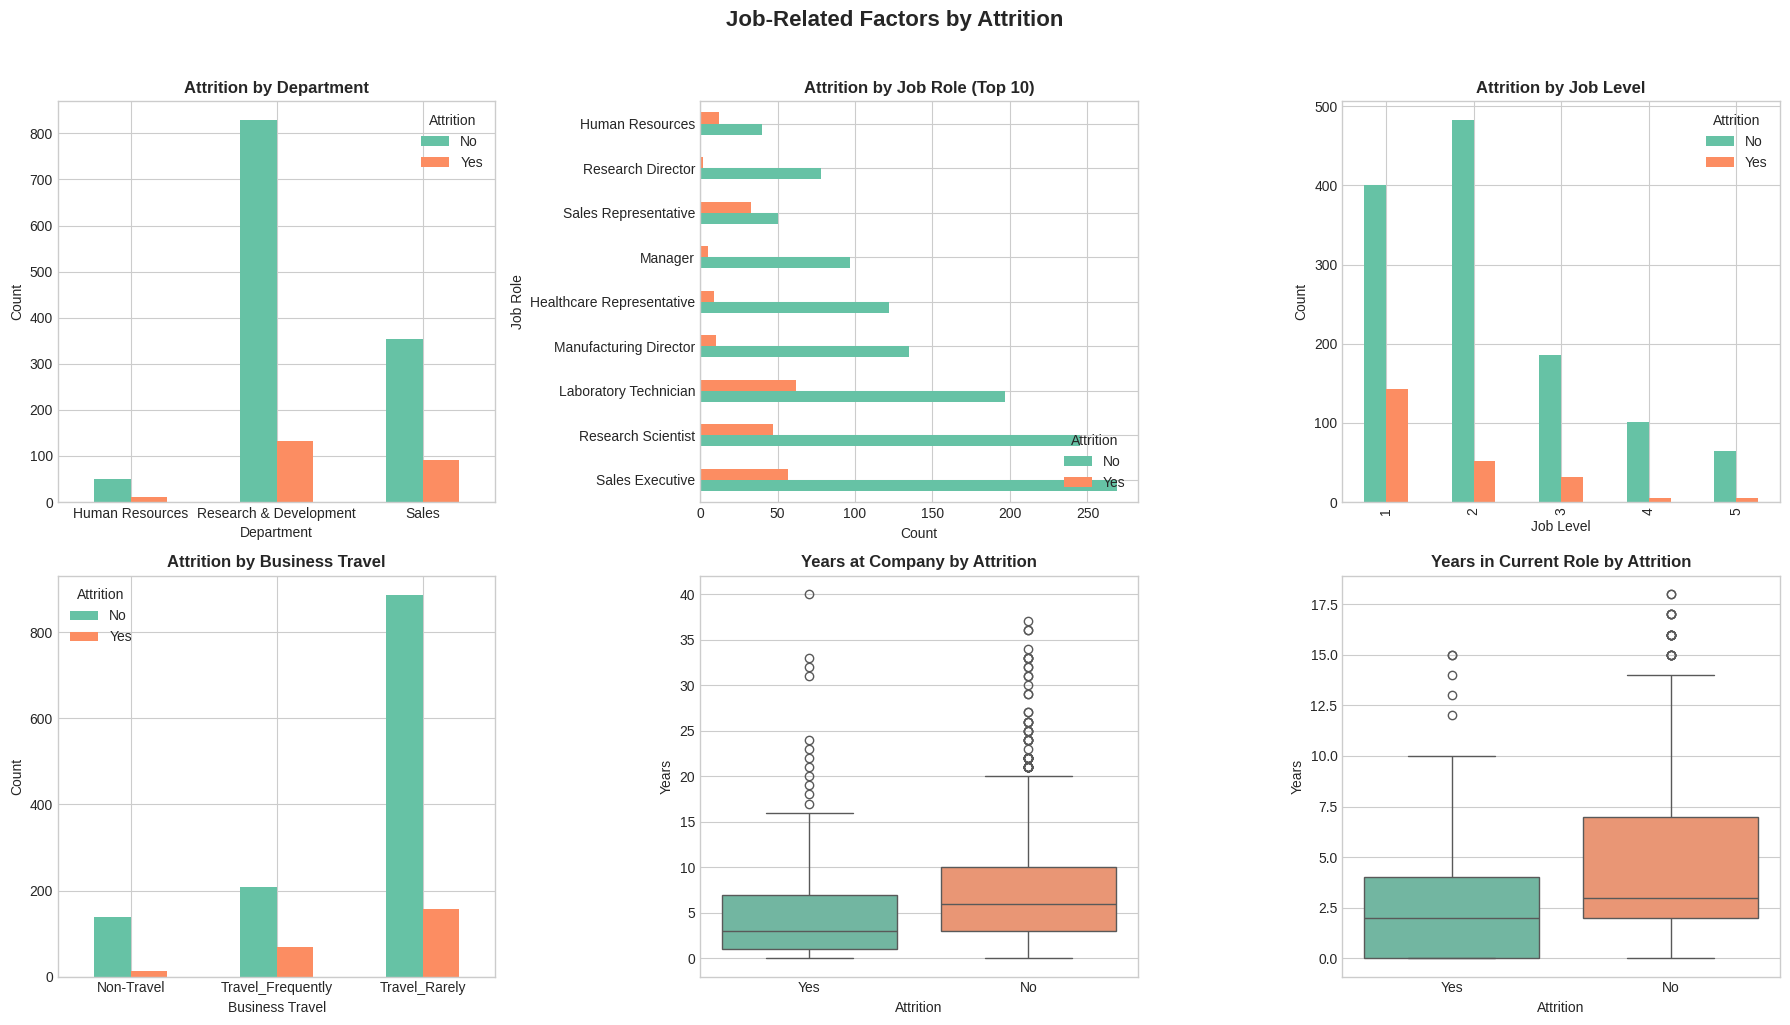

In [3]:
print("\n" + "="*80)
print("JOB-RELATED FACTORS ANALYSIS")
print("="*80)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Job-Related Factors by Attrition', fontsize=16, fontweight='bold', y=1.02)

# 1. Department
dept_data = df.groupby(['Department', 'Attrition']).size().unstack()
dept_data.plot(kind='bar', ax=axes[0, 0], color=['#66c2a5', '#fc8d62'], rot=0)
axes[0, 0].set_title('Attrition by Department', fontweight='bold')
axes[0, 0].set_xlabel('Department')
axes[0, 0].set_ylabel('Count')
axes[0, 0].legend(title='Attrition')

# 2. Job Role (Top 10)
jobrole_attrition = df.groupby(['JobRole', 'Attrition']).size().unstack(fill_value=0)
top_roles = jobrole_attrition.sum(axis=1).nlargest(10).index
jobrole_attrition.loc[top_roles].plot(kind='barh', ax=axes[0, 1], color=['#66c2a5', '#fc8d62'])
axes[0, 1].set_title('Attrition by Job Role (Top 10)', fontweight='bold')
axes[0, 1].set_xlabel('Count')
axes[0, 1].set_ylabel('Job Role')
axes[0, 1].legend(title='Attrition', loc='lower right')

# 3. Job Level
joblevel_data = df.groupby(['JobLevel', 'Attrition']).size().unstack()
joblevel_data.plot(kind='bar', ax=axes[0, 2], color=['#66c2a5', '#fc8d62'])
axes[0, 2].set_title('Attrition by Job Level', fontweight='bold')
axes[0, 2].set_xlabel('Job Level')
axes[0, 2].set_ylabel('Count')
axes[0, 2].legend(title='Attrition')

# 4. Business Travel
travel_data = df.groupby(['BusinessTravel', 'Attrition']).size().unstack()
travel_data.plot(kind='bar', ax=axes[1, 0], color=['#66c2a5', '#fc8d62'], rot=0)
axes[1, 0].set_title('Attrition by Business Travel', fontweight='bold')
axes[1, 0].set_xlabel('Business Travel')
axes[1, 0].set_ylabel('Count')
axes[1, 0].legend(title='Attrition')

# 5. Years at Company
sns.boxplot(data=df, x='Attrition', y='YearsAtCompany', ax=axes[1, 1], palette='Set2')
axes[1, 1].set_title('Years at Company by Attrition', fontweight='bold')
axes[1, 1].set_xlabel('Attrition')
axes[1, 1].set_ylabel('Years')

# 6. Years in Current Role
sns.boxplot(data=df, x='Attrition', y='YearsInCurrentRole', ax=axes[1, 2], palette='Set2')
axes[1, 2].set_title('Years in Current Role by Attrition', fontweight='bold')
axes[1, 2].set_xlabel('Attrition')
axes[1, 2].set_ylabel('Years')

plt.tight_layout()
plt.show()


# SECTION 4: COMPENSATION ANALYSIS


COMPENSATION & WORK ENVIRONMENT ANALYSIS


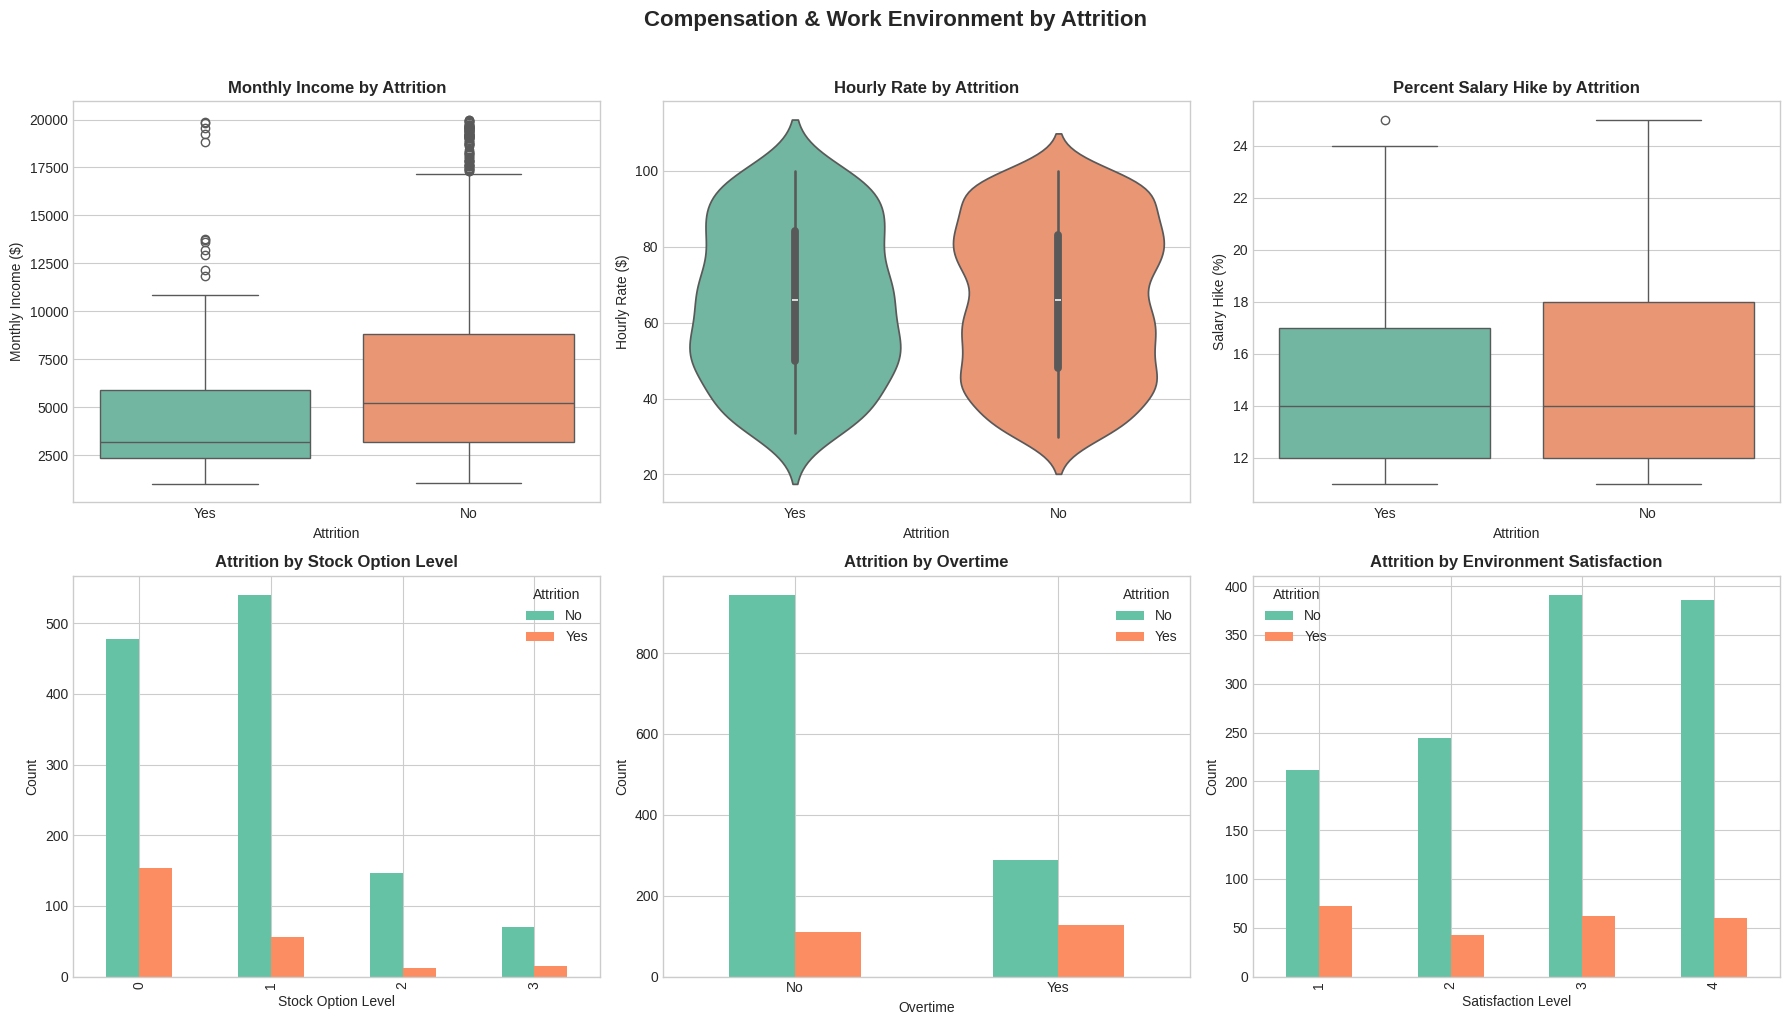

In [4]:
print("\n" + "="*80)
print("COMPENSATION & WORK ENVIRONMENT ANALYSIS")
print("="*80)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Compensation & Work Environment by Attrition', fontsize=16, fontweight='bold', y=1.02)

# 1. Monthly Income
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Monthly Income by Attrition', fontweight='bold')
axes[0, 0].set_xlabel('Attrition')
axes[0, 0].set_ylabel('Monthly Income ($)')

# 2. Hourly Rate
sns.violinplot(data=df, x='Attrition', y='HourlyRate', ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Hourly Rate by Attrition', fontweight='bold')
axes[0, 1].set_xlabel('Attrition')
axes[0, 1].set_ylabel('Hourly Rate ($)')

# 3. Percent Salary Hike
sns.boxplot(data=df, x='Attrition', y='PercentSalaryHike', ax=axes[0, 2], palette='Set2')
axes[0, 2].set_title('Percent Salary Hike by Attrition', fontweight='bold')
axes[0, 2].set_xlabel('Attrition')
axes[0, 2].set_ylabel('Salary Hike (%)')

# 4. Stock Option Level
stock_data = df.groupby(['StockOptionLevel', 'Attrition']).size().unstack()
stock_data.plot(kind='bar', ax=axes[1, 0], color=['#66c2a5', '#fc8d62'])
axes[1, 0].set_title('Attrition by Stock Option Level', fontweight='bold')
axes[1, 0].set_xlabel('Stock Option Level')
axes[1, 0].set_ylabel('Count')
axes[1, 0].legend(title='Attrition')

# 5. Overtime
overtime_data = df.groupby(['OverTime', 'Attrition']).size().unstack()
overtime_data.plot(kind='bar', ax=axes[1, 1], color=['#66c2a5', '#fc8d62'], rot=0)
axes[1, 1].set_title('Attrition by Overtime', fontweight='bold')
axes[1, 1].set_xlabel('Overtime')
axes[1, 1].set_ylabel('Count')
axes[1, 1].legend(title='Attrition')

# 6. Environment Satisfaction
envsat_data = df.groupby(['EnvironmentSatisfaction', 'Attrition']).size().unstack()
envsat_data.plot(kind='bar', ax=axes[1, 2], color=['#66c2a5', '#fc8d62'])
axes[1, 2].set_title('Attrition by Environment Satisfaction', fontweight='bold')
axes[1, 2].set_xlabel('Satisfaction Level')
axes[1, 2].set_ylabel('Count')
axes[1, 2].legend(title='Attrition')

plt.tight_layout()
plt.show()


# SECTION 5: SATISFACTION & PERFORMANCE


SATISFACTION & PERFORMANCE ANALYSIS


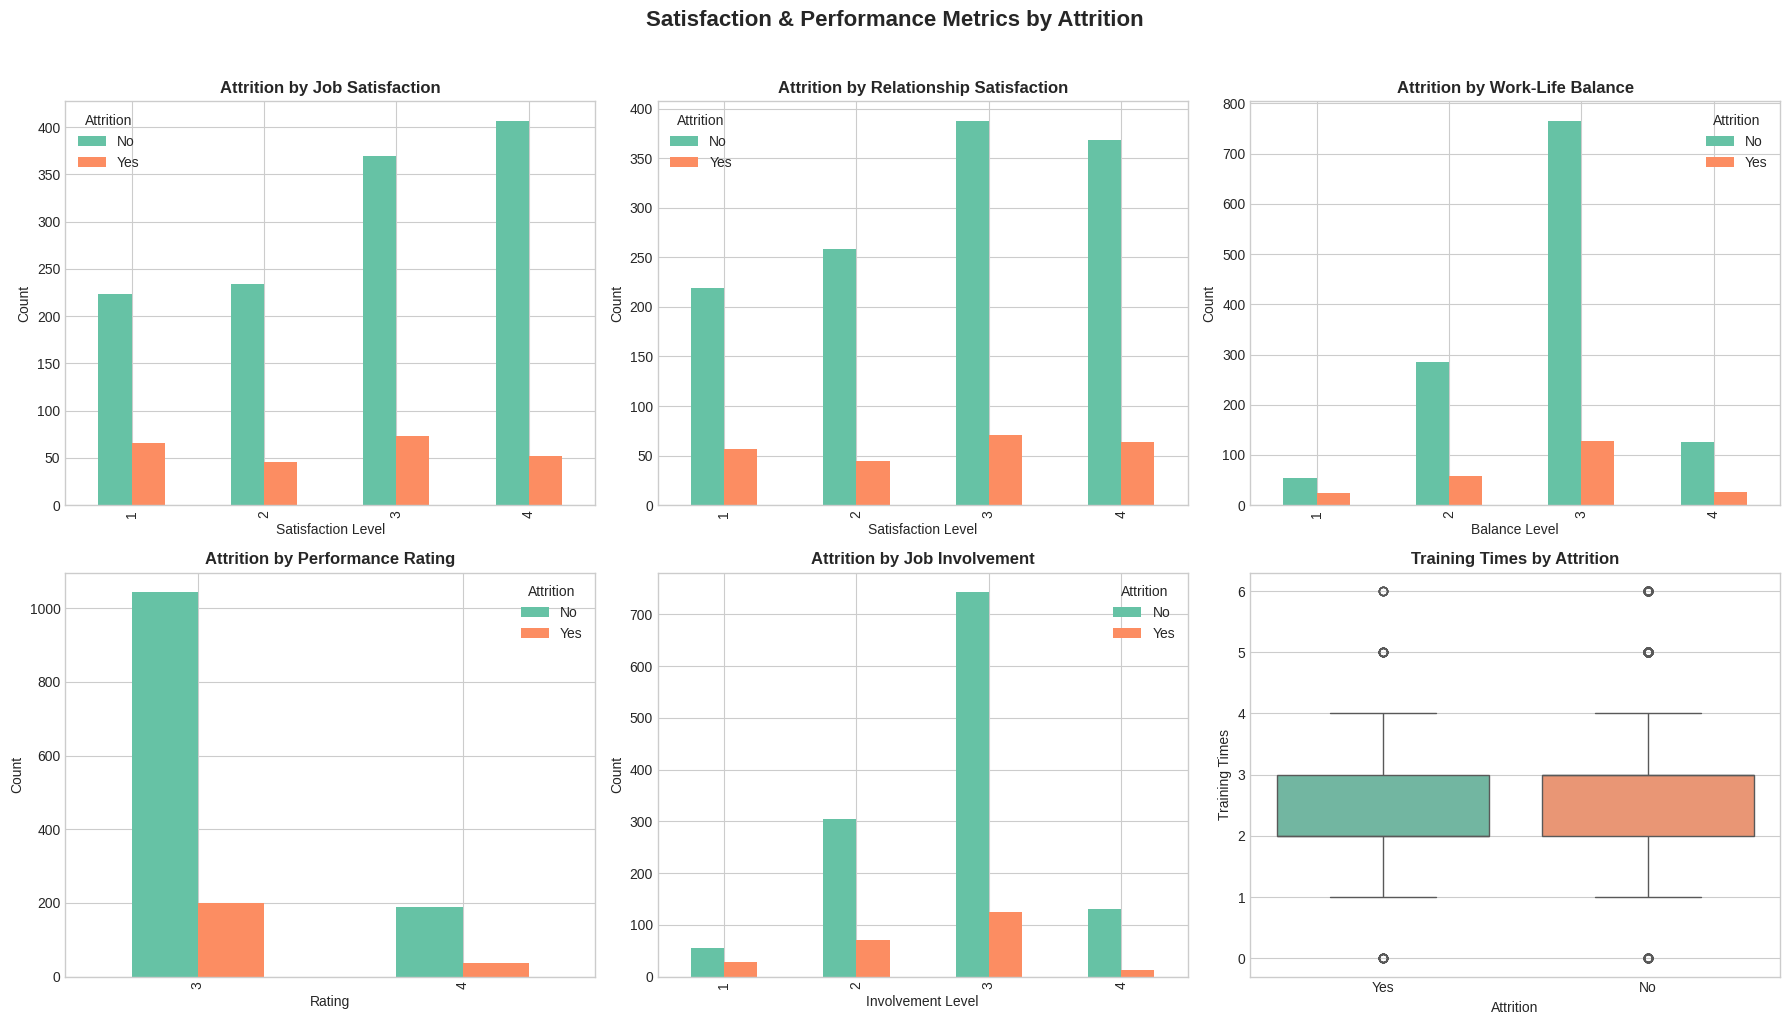

In [5]:
print("\n" + "="*80)
print("SATISFACTION & PERFORMANCE ANALYSIS")
print("="*80)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Satisfaction & Performance Metrics by Attrition', fontsize=16, fontweight='bold', y=1.02)

# 1. Job Satisfaction
jobsat_data = df.groupby(['JobSatisfaction', 'Attrition']).size().unstack()
jobsat_data.plot(kind='bar', ax=axes[0, 0], color=['#66c2a5', '#fc8d62'])
axes[0, 0].set_title('Attrition by Job Satisfaction', fontweight='bold')
axes[0, 0].set_xlabel('Satisfaction Level')
axes[0, 0].set_ylabel('Count')
axes[0, 0].legend(title='Attrition')

# 2. Relationship Satisfaction
relsat_data = df.groupby(['RelationshipSatisfaction', 'Attrition']).size().unstack()
relsat_data.plot(kind='bar', ax=axes[0, 1], color=['#66c2a5', '#fc8d62'])
axes[0, 1].set_title('Attrition by Relationship Satisfaction', fontweight='bold')
axes[0, 1].set_xlabel('Satisfaction Level')
axes[0, 1].set_ylabel('Count')
axes[0, 1].legend(title='Attrition')

# 3. Work-Life Balance
wlb_data = df.groupby(['WorkLifeBalance', 'Attrition']).size().unstack()
wlb_data.plot(kind='bar', ax=axes[0, 2], color=['#66c2a5', '#fc8d62'])
axes[0, 2].set_title('Attrition by Work-Life Balance', fontweight='bold')
axes[0, 2].set_xlabel('Balance Level')
axes[0, 2].set_ylabel('Count')
axes[0, 2].legend(title='Attrition')

# 4. Performance Rating
perf_data = df.groupby(['PerformanceRating', 'Attrition']).size().unstack()
perf_data.plot(kind='bar', ax=axes[1, 0], color=['#66c2a5', '#fc8d62'])
axes[1, 0].set_title('Attrition by Performance Rating', fontweight='bold')
axes[1, 0].set_xlabel('Rating')
axes[1, 0].set_ylabel('Count')
axes[1, 0].legend(title='Attrition')

# 5. Job Involvement
involve_data = df.groupby(['JobInvolvement', 'Attrition']).size().unstack()
involve_data.plot(kind='bar', ax=axes[1, 1], color=['#66c2a5', '#fc8d62'])
axes[1, 1].set_title('Attrition by Job Involvement', fontweight='bold')
axes[1, 1].set_xlabel('Involvement Level')
axes[1, 1].set_ylabel('Count')
axes[1, 1].legend(title='Attrition')

# 6. Training Times Last Year
sns.boxplot(data=df, x='Attrition', y='TrainingTimesLastYear', ax=axes[1, 2], palette='Set2')
axes[1, 2].set_title('Training Times by Attrition', fontweight='bold')
axes[1, 2].set_xlabel('Attrition')
axes[1, 2].set_ylabel('Training Times')

plt.tight_layout()
plt.show()


# SECTION 6: CORRELATION ANALYSIS


CORRELATION ANALYSIS


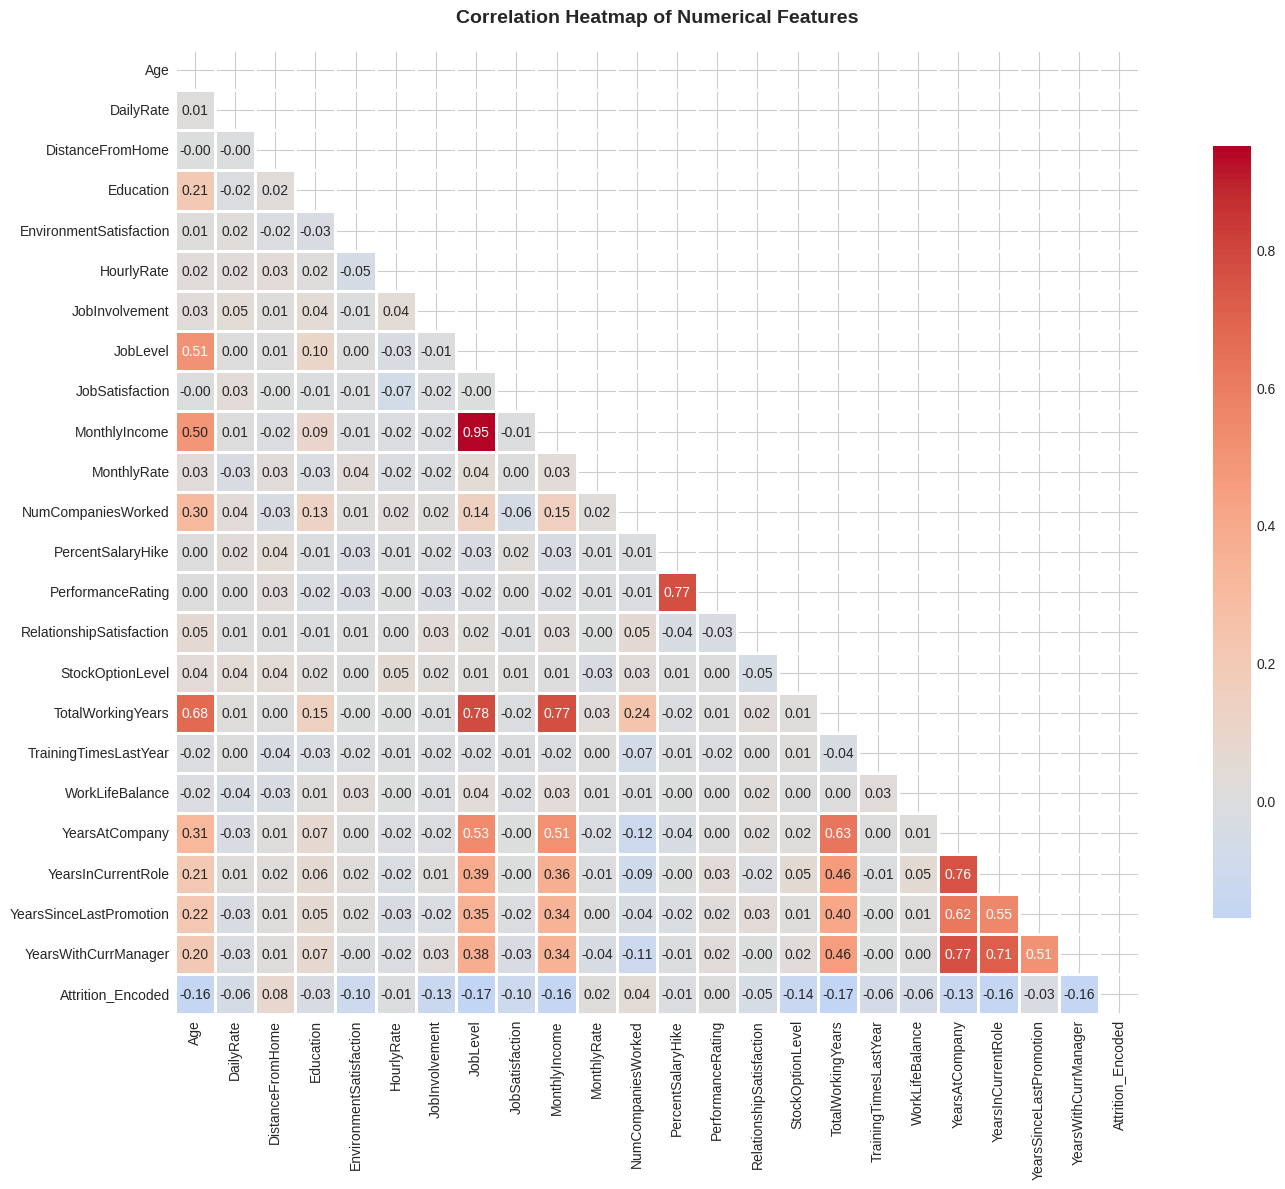


📊 Top 10 Features Correlated with Attrition:
   1. TotalWorkingYears              → 0.1711
   2. JobLevel                       → 0.1691
   3. YearsInCurrentRole             → 0.1605
   4. MonthlyIncome                  → 0.1598
   5. Age                            → 0.1592
   6. YearsWithCurrManager           → 0.1562
   7. StockOptionLevel               → 0.1371
   8. YearsAtCompany                 → 0.1344
   9. JobInvolvement                 → 0.1300
  10. JobSatisfaction                → 0.1035


In [6]:
print("\n" + "="*80)
print("CORRELATION ANALYSIS")
print("="*80)

# Select numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Calculate correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Numerical Features', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Top correlations with Attrition
if 'Attrition_Encoded' in df.columns:
    attrition_corr = corr_matrix['Attrition_Encoded'].abs().sort_values(ascending=False)[1:11]
    print("\n📊 Top 10 Features Correlated with Attrition:")
    for idx, (feature, corr) in enumerate(attrition_corr.items(), 1):
        print(f"  {idx:2d}. {feature:30s} → {corr:.4f}")


# SECTION 7: INTERACTIVE PLOTLY VISUALIZATIONS

In [8]:
print("\n" + "="*80)
print("CREATING INTERACTIVE VISUALIZATIONS")
print("="*80)

# 1. 3D Scatter: Age vs Income vs Years at Company
fig = px.scatter_3d(df, x='Age', y='MonthlyIncome', z='YearsAtCompany',
                    color='Attrition', size='PercentSalaryHike',
                    title='3D View: Age, Income, and Tenure by Attrition',
                    labels={'MonthlyIncome': 'Monthly Income ($)',
                            'YearsAtCompany': 'Years at Company'},
                    color_discrete_map={'Yes': '#fc8d62', 'No': '#66c2a5'})
fig.show()

# 2. Sunburst: Department → JobRole → Attrition
fig = px.sunburst(df, path=['Department', 'JobRole', 'Attrition'],
                  title='Hierarchical View: Department → Job Role → Attrition')
fig.show()

# 3. Box Plot: Income by Department and Attrition
fig = px.box(df, x='Department', y='MonthlyIncome', color='Attrition',
             title='Monthly Income Distribution by Department and Attrition',
             color_discrete_map={'Yes': '#fc8d62', 'No': '#66c2a5'})
fig.show()

print("\n✅ EDA Complete!")
print("📊 Key insights discovered - ready for feature engineering and modeling!")



CREATING INTERACTIVE VISUALIZATIONS



✅ EDA Complete!
📊 Key insights discovered - ready for feature engineering and modeling!
